In [26]:
import pandas as pd
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from sklearn.manifold import TSNE

/anaconda/envs/oppe4rl_22/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
#reading all the files

#reading the first file
df = pd.read_csv('../src/outputs/run_history_19.csv', sep=';', index_col=0)
df_emb = pd.read_csv('../src/outputs/run_history_emb_idx_19.csv', sep=';', index_col=0)
np_emb_state = np.load('../src/outputs/emb_states_19.npy', allow_pickle=True)
np_emb_next_state = np.load('../src/outputs/next_states_19.npy', allow_pickle=True)

skeeped_files = []
#adding all the others
list1 = list(range(39, 5000, 20))
for i in tqdm.tqdm(list1):
    s1 = '../src/outputs/run_history_' + str(i) + '.csv'
    df_ = pd.read_csv(s1, sep=';', index_col=0)
    s2 = '../src/outputs/emb_states_' + str(i) + '.npy'
    np_emb_state_ = np.load(s2, allow_pickle=True)
    s3 = '../src/outputs/next_states_' + str(i) + '.npy'
    np_emb_next_state_ = np.load(s3, allow_pickle=True)
    if np_emb_state_.shape[0] != df_.shape[0] or np_emb_next_state_.shape[0] != df_.shape[0]:
        print ('skeeping file %d' %i)
        skeeped_files.append(s1)
        skeeped_files.append(s2)
        skeeped_files.append(s3)
    else:
        df = pd.concat([df,df_], axis=0)
        np_emb_state = np.concatenate((np_emb_state, np_emb_state_))
        np_emb_next_state = np.concatenate((np_emb_next_state, np_emb_next_state_))


 29%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               | 71/249 [00:15<00:32,  5.54it/s]

skeeping file 1439


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                    | 198/249 [00:40<00:09,  5.13it/s]

skeeping file 3979


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 232/249 [00:47<00:03,  4.58it/s]

skeeping file 4659


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 235/249 [00:48<00:02,  5.00it/s]

skeeping file 4699


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 249/249 [00:50<00:00,  4.89it/s]


In [6]:
print(df.shape)
print(np_emb_state.shape)
print(np_emb_next_state.shape)

(120311, 8)
(120311,)
(120311,)


In [7]:
df.head()

,episode,step,original_payload,state,action,next_state,reward,win
0,1,1,""" select * from users where id = 1 or 1#"""" ( ...",""" select * from users where id = 1 or 1#"""" ( ...",5,""" select * from users where id = 1 or 1#"""" ( ...",-0.550000,0
1,1,2,""" select * from users where id = 1 or 1#"""" ( ...",""" select * from users where id = 1 or 1#"""" ( ...",11,""" select * from users where id = 1 or...",-0.306931,0
2,1,3,""" select * from users where id = 1 or 1#"""" ( ...",""" select * from users where id = 1 or...",22,""" select * from users where id = 1 or...",-0.306931,0
3,1,4,""" select * from users where id = 1 or 1#"""" ( ...",""" select * from users where id = 1 or...",14,""" #=r*&C\nselect #=r*&C\n* #=r*&C\nfrom #=r*&C...",-0.044053,0
4,1,5,""" select * from users where id = 1 or 1#"""" ( ...",""" #=r*&C\nselect #=r*&C\n* #=r*&C\nfrom #=r*&C...",16,""" #=r*&C\nselect #=r*&C\n* #=r*&C\nfrom #=r*&C...",-0.043668,0


In [12]:
#1. visualize winning states

df_winning = df[df['win'] == 1]
df_winning.size

11888

In [58]:
df_winning.head()

,episode,step,original_payload,state,action,next_state,reward,win
129,5,10,or 1 = 1 /*,\t#_4v7;\n#_4v7;\n||#_4v7;\n\t#_4v7;\n1\t#_4v7...,7,\t#_4v7;\n#_4v7;\n||#_4v7;\n\t#_4v7;\n0x1\t#_4...,0.0,1
183,7,24,""" ) or benchmark ( 10000000,MD5 ( 1 ) ) #""","""\t )\t \t or\t benchmark\t (\t 0x989680...",9,"""\t \t )\t \t \t \t or\t \t benchmark\t \t (\t...",0.0,1
224,9,11,or pg_sleep ( __TIME__ ) --,\n\n \n ||\n \n\n pg_sleep\n\n (\n\n __TIME__\...,14,\n\n#p7D$y2\n\n#p7D$y2\n||\n#p7D$y2\n\n\n#p7D$...,0.0,1
287,12,3,a' or 'a' = 'a,a' or 'a' = 'a,12,a' or 'a' = 'a,0.0,1
298,13,11,or 1 = 1/*,or\n\t \n 0x1\n\t \n =\n\t \n 0x1/*,14,or\n\t \n#7IM6ta\n0x1\n\t \n#7IM6ta\n=\n\t \n#...,0.0,1


In [60]:
df[df['episode'] == 7]

,episode,step,original_payload,state,action,next_state,reward,win
160,7,1,""" ) or benchmark ( 10000000,MD5 ( 1 ) ) #""",""" ) or benchmark ( 10000000,MD5 ( 1 ) ) #""",24,""" ) or benchmark ( 10000000,MD5 ( 1 ) ) O...",-0.235294,0
161,7,2,""" ) or benchmark ( 10000000,MD5 ( 1 ) ) #""",""" ) or benchmark ( 10000000,MD5 ( 1 ) ) O...",19,""" ) or benchmark ( 10000000,MD5 ( 1 ) ) O...",-0.235294,0
162,7,3,""" ) or benchmark ( 10000000,MD5 ( 1 ) ) #""",""" ) or benchmark ( 10000000,MD5 ( 1 ) ) O...",9,"""\t )\t \t or\t benchmark\t (\t 10000000,MD5\t...",-0.149254,0
163,7,4,""" ) or benchmark ( 10000000,MD5 ( 1 ) ) #""","""\t )\t \t or\t benchmark\t (\t 10000000,MD5\t...",0,"""\t/**/)\t/**/\t/**/or\t/**/benchmark\t/**/(\t...",-0.373913,0
164,7,5,""" ) or benchmark ( 10000000,MD5 ( 1 ) ) #""","""\t/**/)\t/**/\t/**/or\t/**/benchmark\t/**/(\t...",0,"""\t/**/)\t/**/\t/**/or\t/**/benchmark\t/**/(\t...",-0.373913,0
165,7,6,""" ) or benchmark ( 10000000,MD5 ( 1 ) ) #""","""\t/**/)\t/**/\t/**/or\t/**/benchmark\t/**/(\t...",24,"""\t/**/)\t/**/\t/**/or\t/**/benchmark\t/**/(\t...",-0.383333,0
166,7,7,""" ) or benchmark ( 10000000,MD5 ( 1 ) ) #""","""\t/**/)\t/**/\t/**/or\t/**/benchmark\t/**/(\t...",21,"""\t/**/)\t/**/\t/**/or\t/**/benchmark\t/**/(\t...",-0.383333,0
167,7,8,""" ) or benchmark ( 10000000,MD5 ( 1 ) ) #""","""\t/**/)\t/**/\t/**/or\t/**/benchmark\t/**/(\t...",17,"""\t/**/)\t/**/\t/**/or\t/**/benchmark\t/**/(\t...",-0.383333,0
168,7,9,""" ) or benchmark ( 10000000,MD5 ( 1 ) ) #""","""\t/**/)\t/**/\t/**/or\t/**/benchmark\t/**/(\t...",24,"""\t/**/)\t/**/\t/**/or\t/**/benchmark\t/**/(\t...",-0.384000,0
169,7,10,""" ) or benchmark ( 10000000,MD5 ( 1 ) ) #""","""\t/**/)\t/**/\t/**/or\t/**/benchmark\t/**/(\t...",25,"""\t/**/)\t/**/\t/**/or\t/**/benchmark\t/**/(\t...",-0.384000,0


In [16]:
df_viz = pd.DataFrame()
df_viz['emb'] = np_emb_state
df_viz.insert(1, "win", df['win'].values, allow_duplicates=True)
df_viz.head()

,emb,win
0,"[0.109361544, -0.14715056, 0.059212167, 0.1143...",0
1,"[0.016058901, -0.17189959, 0.0003536803, 0.213...",0
2,"[0.016058901, -0.17189959, 0.0003536803, 0.213...",0
3,"[0.06040567, -0.16667655, 0.033862215, 0.23549...",0
4,"[0.06040567, -0.16667655, 0.033862215, 0.23549...",0


In [30]:
data = df_viz['emb'].values.copy()

In [47]:
data = np.array(data.tolist())

In [49]:
data.shape

(120311, 768)

In [54]:
df_viz['win'].values


array([0, 0, 0, ..., 0, 0, 0])

In [52]:
from sklearn.manifold import TSNE


n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(data)
tsne_result.shape

(120311, 2)

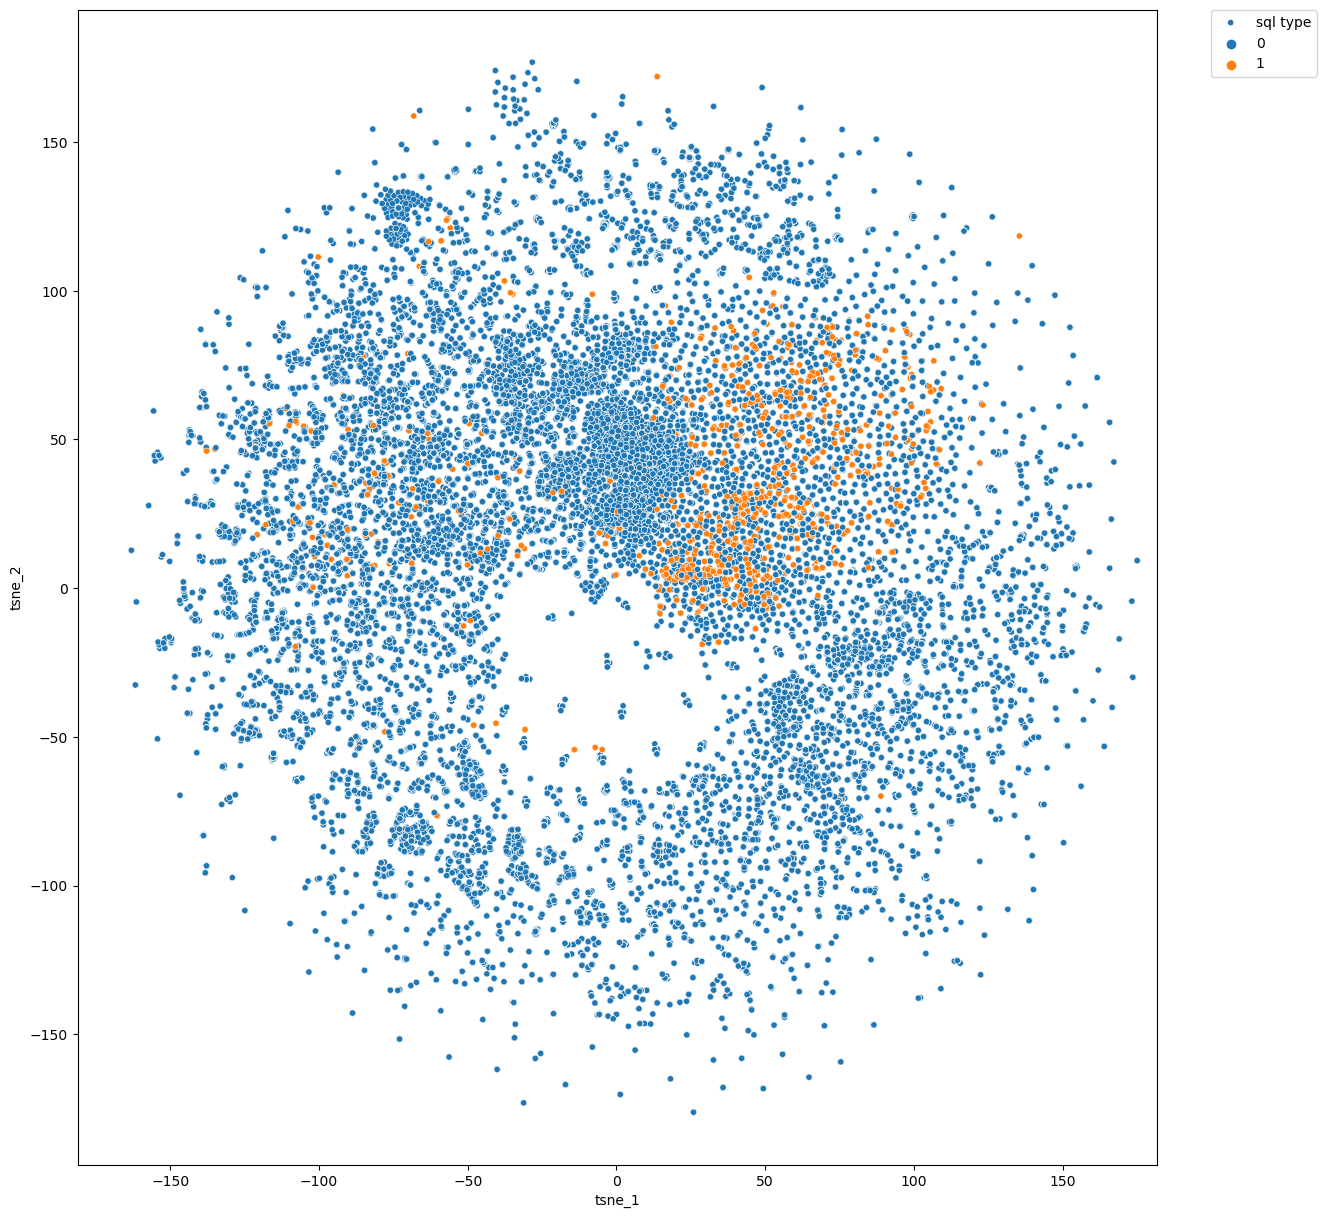

In [55]:
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'win': df_viz['win'].values})
fig, ax = plt.subplots(1, figsize=(15, 15))

sns.scatterplot(x='tsne_1', y='tsne_2', hue='win', label='win', data=tsne_result_df, ax=ax,s=20)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)

ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

<Axes: >

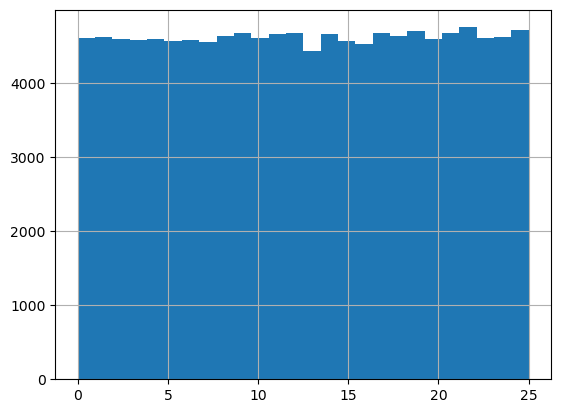

In [65]:
df['action'].hist(bins=26)

In [62]:
#podemos visualizar una accion concreta?

action = 7

df_action = df[df['action'] == action].copy()
df_action.head()

,episode,step,original_payload,state,action,next_state,reward,win
8,1,9,""" select * from users where id = 1 or 1#"""" ( ...",""" #=r*&C\nselect #=r*&C\n* #=r*&C\nfrom #=r*&C...",7,""" #=r*&C\nselect #=r*&C\n* #=r*&C\nfrom #=r*&C...",-0.067511,0
33,2,4,""" select * from users where id = '1' union sel...",""" select * from users where id = '1' union sel...",7,""" select * from users where id = '1' union sel...",-0.535088,0
39,2,10,""" select * from users where id = '1' union sel...",""" select * from users where id LIKE '1' unio...",7,""" select * from users where id LIKE '1' unio...",-0.508065,0
87,3,28,""" select * from users where id = 1 or \.<\ uni...",""" OR 0#5he8_\nselect OR 0#5he8_\...",7,""" OR 0x0#5he8_\nselect OR 0x0#5h...",-0.152098,0
91,4,2,""" select * from users where id = '1' or @ 1 = ...",""" select * from users where id = '1' or @ 1 = ...",7,""" select * from users where id = '1' or @ 0x1 ...",-0.471910,0


In [72]:
df_viz = pd.DataFrame(columns=['emb', 'orig'])
for i, step in df_action.iterrows():
    emb = np_emb_state[i]
    n_emb = np_emb_next_state[i]
    df1 = pd.DataFrame({'emb': emb, 'orig': 0 })
    df2 = pd.DataFrame({'emb': n_emb, 'orig': 1 })
    df_viz = pd.concat([df_viz, df1], ignore_index=True)
    df_viz = pd.concat([df_viz, df2], ignore_index=True)


In [73]:
df_viz.head()

,emb,orig
0,0.060406,0
1,-0.166677,0
2,0.033862,0
3,0.235496,0
4,0.113262,0
